In [80]:
# Import required libraries and modules

import os,time,logging,collections,math,itertools
import sklearn
import numpy as np
import pandas as pd
import scipy.stats as stats
import scipy.sparse
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
from datetime import datetime as dt
from sklearn import cluster
from sklearn import decomposition 
from sklearn.cluster import KMeans
from scipy.cluster.vq import kmeans, vq
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn import datasets, linear_model
from sklearn.linear_model import Lasso
from sklearn.feature_extraction import DictVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
%matplotlib inline

In [81]:
# Import datasets downloaded from Kaggle

train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
store = pd.read_csv("stores.csv")
feature = pd.read_csv("features.csv")

In [82]:
train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [83]:
feature.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [84]:
data = pd.merge(train,feature, on=['Store','Date', 'IsHoliday'], how='inner')

In [85]:
data.shape

(421570, 14)

In [86]:
data.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
1,1,2,2010-02-05,50605.27,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
2,1,3,2010-02-05,13740.12,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
3,1,4,2010-02-05,39954.04,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
4,1,5,2010-02-05,32229.38,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106


In [87]:
data.describe()

,Store,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
count,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,150681.000000,111248.000000,137091.000000,134967.000000,151432.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123,60.090059,3.361027,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,171.201947,7.960289
std,12.785297,30.492054,22711.183519,18.447931,0.458515,8291.221345,9475.357325,9623.078290,6292.384031,5962.887455,39.159276,1.863296
min,1.000000,1.000000,-4988.940000,-2.060000,2.472000,0.270000,-265.760000,-29.100000,0.220000,135.160000,126.064000,3.879000
25%,11.000000,18.000000,2079.650000,46.680000,2.933000,2240.270000,41.600000,5.080000,504.220000,1878.440000,132.022667,6.891000
50%,22.000000,37.000000,7612.030000,62.090000,3.452000,5347.450000,192.000000,24.600000,1481.310000,3359.450000,182.318780,7.866000
75%,33.000000,74.000000,20205.852500,74.280000,3.738000,9210.900000,1926.940000,103.990000,3595.040000,5563.800000,212.416993,8.572000
max,45.000000,99.000000,693099.360000,100.140000,4.468000,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000,227.232807,14.313000


In [88]:
# Convert date to pandas datetime object
data['Date'] = pd.to_datetime(data['Date'])

In [89]:
# Impute missing values or NaNs with the median value of that field

data.fillna(data.median(), inplace=True)

In [90]:
data.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2010-02-05,24924.50,False,42.31,2.572,5347.45,192.0,24.6,1481.31,3359.45,211.096358,8.106
1,1,2,2010-02-05,50605.27,False,42.31,2.572,5347.45,192.0,24.6,1481.31,3359.45,211.096358,8.106
2,1,3,2010-02-05,13740.12,False,42.31,2.572,5347.45,192.0,24.6,1481.31,3359.45,211.096358,8.106
3,1,4,2010-02-05,39954.04,False,42.31,2.572,5347.45,192.0,24.6,1481.31,3359.45,211.096358,8.106
4,1,5,2010-02-05,32229.38,False,42.31,2.572,5347.45,192.0,24.6,1481.31,3359.45,211.096358,8.106


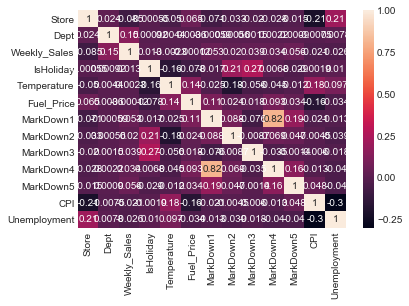

In [91]:
# Plot heatmap for each pair of features in the data
sns.heatmap(data.corr(), annot=True)

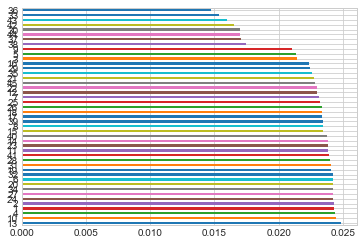

In [92]:
data['Store'].value_counts(normalize=True).plot(kind = 'barh')

In [93]:
def is_holiday(ele):
    if 'False' in ele:
        return 1
    else:
        return 0

In [94]:
# data['IsHoliday'] = is_holiday(data.IsHoliday)
data.IsHoliday = data.IsHoliday.astype(int)

In [95]:
# Extract date features
data['Date_dayofweek'] = data['Date'].dt.dayofweek
data['Date_month'] = data['Date'].dt.month
data['Date_year'] = data['Date'].dt.year
data['Date_day'] = data['Date'].dt.day

In [96]:
data.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Date_dayofweek,Date_month,Date_year,Date_day
0,1,1,2010-02-05,24924.50,0,42.31,2.572,5347.45,192.0,24.6,1481.31,3359.45,211.096358,8.106,4,2,2010,5
1,1,2,2010-02-05,50605.27,0,42.31,2.572,5347.45,192.0,24.6,1481.31,3359.45,211.096358,8.106,4,2,2010,5
2,1,3,2010-02-05,13740.12,0,42.31,2.572,5347.45,192.0,24.6,1481.31,3359.45,211.096358,8.106,4,2,2010,5
3,1,4,2010-02-05,39954.04,0,42.31,2.572,5347.45,192.0,24.6,1481.31,3359.45,211.096358,8.106,4,2,2010,5
4,1,5,2010-02-05,32229.38,0,42.31,2.572,5347.45,192.0,24.6,1481.31,3359.45,211.096358,8.106,4,2,2010,5


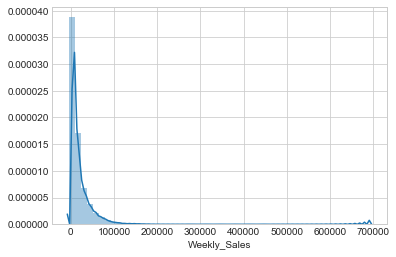

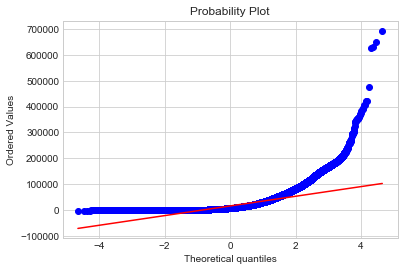

In [97]:
#histogram and normal probability plot
sns.distplot(data['Weekly_Sales']); #, fit=norm);
fig = plt.figure()
res = stats.probplot(data['Weekly_Sales'], plot=plt)

In [116]:
data_p = data.take(np.random.permutation(len(data))[:10000])
print(data_p.shape)

(10000, 18)


In [117]:
data_p = data_p.iloc[:,5:]
data_p.head()

,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Date_dayofweek,Date_month,Date_year,Date_day
52138,49.14,2.943,5347.45,192.00,24.60,1481.31,3359.45,212.914967,7.007,4,12,2010,31
48596,71.17,3.617,2048.94,192.00,6.02,1121.58,2070.87,223.774444,5.422,4,10,2012,5
105237,52.23,3.409,12424.72,4575.75,81.74,8932.68,6987.67,223.753643,6.833,4,2,2012,10
124480,40.65,3.489,11003.75,1090.92,89.88,1201.30,10231.67,129.826833,6.392,4,11,2011,18
308612,56.09,3.767,5347.45,192.00,24.60,1481.31,3359.45,192.826069,8.595,4,5,2011,13


In [118]:
# Remove outliers

feature_outliers  = []

# For each feature find the data points with extreme high or low values
for feature in data_p.keys():
    
    # Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(data_p[feature], 25)
    
    # Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(data_p[feature], 75)
    
    # Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = 1.5*(Q3 - Q1)
    
    # Display the outliers
    #print "Data points considered outliers for the feature '{}':".format(feature)
    display(data_p[~((data_p[feature] >= Q1 - step) & (data_p[feature] <= Q3 + step))])
    feature_outliers.append(data_p[~((data_p[feature] >= Q1 - step) & (data_p[feature] <= Q3 + step))].index)

# Flatten list of outliers from each iteration of the loop above
outliers_flattened = [index for feature in feature_outliers for index in feature]
# Count the number of features for which a given observation is considered an outlier
from collections import Counter
outlier_count = Counter(outliers_flattened)
# Drop observations that are an outlier in 3 or more dimensions of the feature-space
outliers = [observation for observation in outlier_count.elements() if outlier_count[observation] >= 2]

# Remove the outliers, if any were specified
good_data = data_p.drop(data_p.index[outliers]).reset_index(drop = True)

,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Date_dayofweek,Date_month,Date_year,Date_day
62596,-2.06,3.011,5347.45,192.0,24.6,1481.31,3359.45,191.762589,8.818,4,2,2011,4
62604,-2.06,3.011,5347.45,192.0,24.6,1481.31,3359.45,191.762589,8.818,4,2,2011,4
62616,-2.06,3.011,5347.45,192.0,24.6,1481.31,3359.45,191.762589,8.818,4,2,2011,4
160740,6.23,2.891,5347.45,192.0,24.6,1481.31,3359.45,127.191774,6.866,4,1,2011,7


,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Date_dayofweek,Date_month,Date_year,Date_day


,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Date_dayofweek,Date_month,Date_year,Date_day
48596,71.17,3.617,2048.94,192.00,6.02,1121.58,2070.87,223.774444,5.422,4,10,2012,5
105237,52.23,3.409,12424.72,4575.75,81.74,8932.68,6987.67,223.753643,6.833,4,2,2012,10
124480,40.65,3.489,11003.75,1090.92,89.88,1201.30,10231.67,129.826833,6.392,4,11,2011,18
352873,81.52,3.227,259.87,192.00,9.27,1481.31,1155.93,220.567112,6.623,4,7,2012,6
105184,60.24,3.360,50909.18,1957.49,137.23,37091.67,6418.36,223.659114,6.833,4,2,2012,3
37437,59.81,3.707,5669.21,37.12,24.60,8540.87,2544.94,130.826194,4.607,4,3,2012,16
65867,18.67,3.095,2373.44,11519.36,7.26,162.72,4504.47,196.545831,8.256,4,1,2012,6
184804,33.91,3.917,13926.46,11835.35,2.80,4929.34,6287.18,137.341103,7.943,4,2,2012,24
224285,27.01,3.703,8924.48,10140.32,1.88,6699.65,2236.81,137.258310,4.261,4,2,2012,17
387474,32.87,3.505,17118.58,14927.30,309.49,8187.22,4925.08,195.637694,6.759,4,11,2011,11


,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Date_dayofweek,Date_month,Date_year,Date_day
105237,52.23,3.409,12424.72,4575.75,81.74,8932.68,6987.67,223.753643,6.833,4,2,2012,10
124480,40.65,3.489,11003.75,1090.92,89.88,1201.30,10231.67,129.826833,6.392,4,11,2011,18
105184,60.24,3.360,50909.18,1957.49,137.23,37091.67,6418.36,223.659114,6.833,4,2,2012,3
37437,59.81,3.707,5669.21,37.12,24.60,8540.87,2544.94,130.826194,4.607,4,3,2012,16
65867,18.67,3.095,2373.44,11519.36,7.26,162.72,4504.47,196.545831,8.256,4,1,2012,6
184804,33.91,3.917,13926.46,11835.35,2.80,4929.34,6287.18,137.341103,7.943,4,2,2012,24
224285,27.01,3.703,8924.48,10140.32,1.88,6699.65,2236.81,137.258310,4.261,4,2,2012,17
387474,32.87,3.505,17118.58,14927.30,309.49,8187.22,4925.08,195.637694,6.759,4,11,2011,11
156295,77.31,3.693,731.74,107.40,24.60,455.32,1375.35,197.785577,6.169,4,6,2012,29
368518,61.10,3.555,7826.68,6839.78,2.00,983.61,10296.01,219.324464,7.244,4,2,2012,24


,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Date_dayofweek,Date_month,Date_year,Date_day
48596,71.17,3.617,2048.94,192.00,6.02,1121.58,2070.87,223.774444,5.422,4,10,2012,5
105237,52.23,3.409,12424.72,4575.75,81.74,8932.68,6987.67,223.753643,6.833,4,2,2012,10
124480,40.65,3.489,11003.75,1090.92,89.88,1201.30,10231.67,129.826833,6.392,4,11,2011,18
352873,81.52,3.227,259.87,192.00,9.27,1481.31,1155.93,220.567112,6.623,4,7,2012,6
105184,60.24,3.360,50909.18,1957.49,137.23,37091.67,6418.36,223.659114,6.833,4,2,2012,3
65867,18.67,3.095,2373.44,11519.36,7.26,162.72,4504.47,196.545831,8.256,4,1,2012,6
184804,33.91,3.917,13926.46,11835.35,2.80,4929.34,6287.18,137.341103,7.943,4,2,2012,24
224285,27.01,3.703,8924.48,10140.32,1.88,6699.65,2236.81,137.258310,4.261,4,2,2012,17
387474,32.87,3.505,17118.58,14927.30,309.49,8187.22,4925.08,195.637694,6.759,4,11,2011,11
368518,61.10,3.555,7826.68,6839.78,2.00,983.61,10296.01,219.324464,7.244,4,2,2012,24


,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Date_dayofweek,Date_month,Date_year,Date_day
48596,71.17,3.617,2048.94,192.00,6.02,1121.58,2070.87,223.774444,5.422,4,10,2012,5
105237,52.23,3.409,12424.72,4575.75,81.74,8932.68,6987.67,223.753643,6.833,4,2,2012,10
124480,40.65,3.489,11003.75,1090.92,89.88,1201.30,10231.67,129.826833,6.392,4,11,2011,18
105184,60.24,3.360,50909.18,1957.49,137.23,37091.67,6418.36,223.659114,6.833,4,2,2012,3
37437,59.81,3.707,5669.21,37.12,24.60,8540.87,2544.94,130.826194,4.607,4,3,2012,16
65867,18.67,3.095,2373.44,11519.36,7.26,162.72,4504.47,196.545831,8.256,4,1,2012,6
184804,33.91,3.917,13926.46,11835.35,2.80,4929.34,6287.18,137.341103,7.943,4,2,2012,24
224285,27.01,3.703,8924.48,10140.32,1.88,6699.65,2236.81,137.258310,4.261,4,2,2012,17
387474,32.87,3.505,17118.58,14927.30,309.49,8187.22,4925.08,195.637694,6.759,4,11,2011,11
156295,77.31,3.693,731.74,107.40,24.60,455.32,1375.35,197.785577,6.169,4,6,2012,29


,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Date_dayofweek,Date_month,Date_year,Date_day
48596,71.17,3.617,2048.94,192.00,6.02,1121.58,2070.87,223.774444,5.422,4,10,2012,5
105237,52.23,3.409,12424.72,4575.75,81.74,8932.68,6987.67,223.753643,6.833,4,2,2012,10
124480,40.65,3.489,11003.75,1090.92,89.88,1201.30,10231.67,129.826833,6.392,4,11,2011,18
352873,81.52,3.227,259.87,192.00,9.27,1481.31,1155.93,220.567112,6.623,4,7,2012,6
105184,60.24,3.360,50909.18,1957.49,137.23,37091.67,6418.36,223.659114,6.833,4,2,2012,3
37437,59.81,3.707,5669.21,37.12,24.60,8540.87,2544.94,130.826194,4.607,4,3,2012,16
65867,18.67,3.095,2373.44,11519.36,7.26,162.72,4504.47,196.545831,8.256,4,1,2012,6
184804,33.91,3.917,13926.46,11835.35,2.80,4929.34,6287.18,137.341103,7.943,4,2,2012,24
224285,27.01,3.703,8924.48,10140.32,1.88,6699.65,2236.81,137.258310,4.261,4,2,2012,17
387474,32.87,3.505,17118.58,14927.30,309.49,8187.22,4925.08,195.637694,6.759,4,11,2011,11


,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Date_dayofweek,Date_month,Date_year,Date_day


,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Date_dayofweek,Date_month,Date_year,Date_day
271667,70.93,4.202,5347.45,192.00,24.60,1481.31,3359.45,129.089000,13.736,4,5,2011,13
110629,57.79,3.130,5347.45,192.00,24.60,1481.31,3359.45,126.546161,14.313,4,11,2010,12
224285,27.01,3.703,8924.48,10140.32,1.88,6699.65,2236.81,137.258310,4.261,4,2,2012,17
109580,99.22,3.112,5347.45,192.00,24.60,1481.31,3359.45,126.128355,14.180,4,7,2010,23
273126,70.44,3.827,5347.45,192.00,24.60,1481.31,3359.45,129.693800,12.890,4,10,2011,7
39119,75.76,3.610,9983.59,192.00,23.40,8115.89,7158.66,130.838161,4.077,4,8,2012,24
271811,76.67,4.087,5347.45,192.00,24.60,1481.31,3359.45,129.062355,13.736,4,5,2011,27
114729,50.43,3.599,11181.59,33829.84,36.96,624.05,10152.27,130.157516,12.187,4,1,2012,6
379730,64.42,3.577,2925.88,253.20,24.60,400.00,2124.37,138.196267,4.125,4,6,2012,29
274052,50.43,3.599,5155.86,19549.51,218.29,636.73,5218.50,130.157516,12.187,4,1,2012,6


,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Date_dayofweek,Date_month,Date_year,Date_day


,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Date_dayofweek,Date_month,Date_year,Date_day


,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Date_dayofweek,Date_month,Date_year,Date_day


,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Date_dayofweek,Date_month,Date_year,Date_day


IndexError: index 48596 is out of bounds for axis 0 with size 10000

In [119]:
data_v = data_p.values
scaler = StandardScaler()
data_v = scaler.fit_transform(data_v)

In [120]:
# Use silhouette score to find optimal number of clusters to segment the data
num_clusters = np.arange(2,20)
kmeans_results = {}
for size in num_clusters:
    kmeans = KMeans(n_clusters = size).fit(data_v)
    preds = kmeans.predict(data_v)
    kmeans_results[size] = silhouette_score(data_v, preds)

display(kmeans_results)

{2: 0.17070203939002832,
 3: 0.17933188587699123,
 4: 0.18723959295393183,
 5: 0.18955830781316144,
 6: 0.18212518993708424,
 7: 0.18687033209269216,
 8: 0.18448243841303683,
 9: 0.18305458567842275,
 10: 0.2042552318944595,
 11: 0.2001696097014386,
 12: 0.18620801067301332,
 13: 0.17436336212517273,
 14: 0.1787476537260327,
 15: 0.1819458321119188,
 16: 0.18171343651246596,
 17: 0.17699394302636628,
 18: 0.18526686517004154,
 19: 0.1769548901721043}

In [125]:
km = KMeans(3, init='k-means++') # initialize
km.fit(data_v)
ypred = km.predict(data_v) 
ypred

array([1, 0, 0, ..., 1, 0, 1])

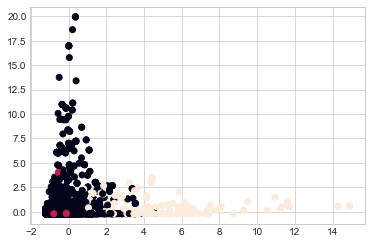

In [126]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
X_pca = pca.fit_transform(data_v)

plt.scatter(data_v[:, 2], data_v[:, 3], c=ypred)

In [127]:
data_p['cluster'] = ypred
data_p.head()

,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Date_dayofweek,Date_month,Date_year,Date_day,cluster
52138,49.14,2.943,5347.45,192.00,24.60,1481.31,3359.45,212.914967,7.007,4,12,2010,31,1
48596,71.17,3.617,2048.94,192.00,6.02,1121.58,2070.87,223.774444,5.422,4,10,2012,5,0
105237,52.23,3.409,12424.72,4575.75,81.74,8932.68,6987.67,223.753643,6.833,4,2,2012,10,0
124480,40.65,3.489,11003.75,1090.92,89.88,1201.30,10231.67,129.826833,6.392,4,11,2011,18,0
308612,56.09,3.767,5347.45,192.00,24.60,1481.31,3359.45,192.826069,8.595,4,5,2011,13,0


In [129]:
data_p.cluster.value_counts()

0    5924
1    3804
2     272
Name: cluster, dtype: int64

In [ ]:
from sklearn.manifold import TSNE
tsne_model = TSNE(learning_rate=10000)
tsne_transformed = tsne_model.fit_transform(data_p[data_p.columns[1:5]])
xs = tsne_transformed[:,0]
ys = tsne_transformed[:,1]
plt.scatter(xs, ys, c=data_p.cluster)
plt.show()